## Logistic Regression
---

### 1. Mathematics

![](img/Logistic Regression Math.png)

### 2. Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

class LogisticRegression:
    def __init__(self):
        self.w = None
        
    def fit(self, x_train, y_train):
        # initialization
        # number of samples
        n_sample = x_train.shape[0]
        # number of features and x0 = 1
        n_feature = x_train.shape[1] + 1
        self.w = np.array([np.zeros(n_feature)]).T

        X = np.concatenate((np.array([np.ones(n_sample)]).T, x_train), axis=1)
        y = y_train

        iteration = 500
        
        costs = self._batch_gradient_descent(X, y, iteration)

        canvas = plt.figure()
        sp = canvas.add_subplot(111)
        
        sp.set_xlim(0, iteration + 1)
        sp.set_ylim(0, np.max(costs))
        sp.plot([i for i in range(1, iteration + 1)], costs)
        sp.set_xlabel('Iteration')
        sp.set_ylabel('Cost')
        
        plt.show()
        
    def predict(self, x_test):
        # make predictions using trained model
        X = np.concatenate((np.array([np.ones(x_test.shape[0])]).T, x_test), axis=1)
        preds = self.sigmoid(np.dot(self.w.T, X.T))
        return preds

    def _batch_gradient_descent(self, X, y, iteration):        
        
        def _compute_cost(w):
            # compute cost for each w
            h = np.dot(w.T, X.T).T
            c = np.sum(-y * h - np.log(self.sigmoid(-h).T)) / m
            return c

        def _update_w(w):
            # update w
            # calculate derivatives based on current w
            deriv = np.array([np.zeros(n)]).T
            for j in range(n):
                sigs = self.sigmoid(np.dot(w.T, X.T)).T
                x_j = X[:, j].reshape(m, 1)

                deriv[j] = np.sum(y * x_j - x_j * sigs) / (-m)
            return w - alpha * deriv
        
        m = X.shape[0]
        n = X.shape[1]
        
        alpha = 0.1
        costs = np.zeros(iteration)
        
        weight = self.w
        
        for i in range(iteration):
            costs[i] = _compute_cost(weight)
            weight = _update_w(weight)
            
        self.w = weight
        
        return costs
    
    def sigmoid(self, x):
        # Sigmoid function
        return 1 / (1 + np.exp(-x))


In [3]:
df = pd.read_csv('data.csv')

In [4]:
X = preprocessing.scale(df[['x1', 'x2']])
# X = df[['x1', 'x2']].values
y = df[['y']].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

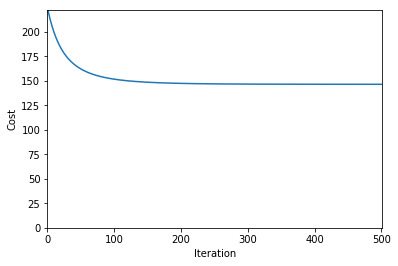

In [5]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

In [6]:
predictions = lr.predict(x_test)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [7]:
errors = predictions.T - y_test
np.count_nonzero(errors) / errors.size

0.2

In [8]:
# Coefficients
lr.w

array([[-0.03335151],
       [ 1.13538268],
       [ 1.5492722 ]])